In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [43]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.
most_recent_observation_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_observation_date

('2017-08-23',)

2016-08-23


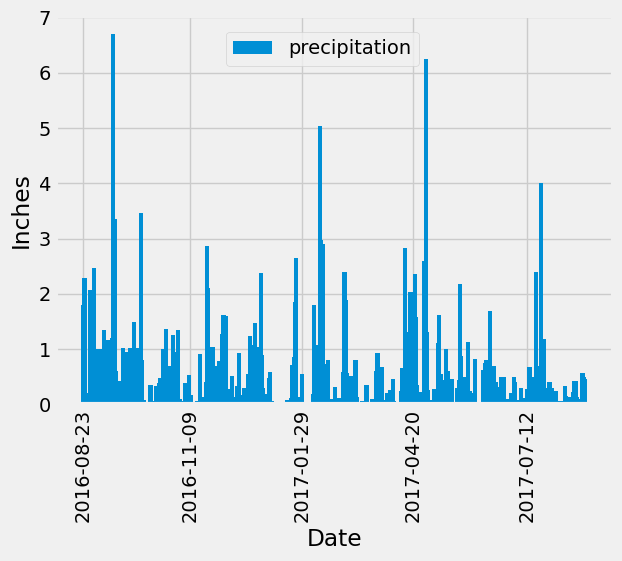

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# NOTE: it could be argued that '2016-08-24' is the more correct date for the most recent 12 months calculation
# but the graph that we were given as a goal showed '2016-08-23' as included so that's how it was calculated
# here.
one_year_before = str(int(most_recent_observation_date[0][:4]) - 1) + most_recent_observation_date[0][4:]
print(one_year_before)


# Perform a query to retrieve the data and precipitation scores
recent_12_months = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23')


# Save the query results as a Pandas DataFrame. Explicitly set the column names
twelve_month_rain_df = pd.DataFrame(recent_12_months, columns=['Date', 'Precipitation (Inches)'])


# Sort the dataframe by date
srt_12_month_df = twelve_month_rain_df.sort_values('Date')
# Remove NAN values for precipitation
clean_srt_12_month_df = srt_12_month_df.loc[srt_12_month_df['Precipitation (Inches)'].isna() != True]


# Use Pandas Plotting with Matplotlib to plot the data
x = clean_srt_12_month_df['Date']
y = clean_srt_12_month_df['Precipitation (Inches)']

plt.bar(x, y, width=3)
plt.xticks(x[::455], rotation = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(labels={'precipitation':"blue"}, loc=(.305, .87))
plt.show()

In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_srt_12_month_df.describe()

Precipitation (Inches)
count             2021.000000
mean                 0.177279
std                  0.461190
min                  0.000000
25%                  0.000000
50%                  0.020000
75%                  0.130000
max                  6.700000

# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [50]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).order_by(func.count(measurement.date).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
lowest_highest_average_query = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_active_station)
lowest_highest_average_query.all()

[(54.0, 85.0, 71.66378066378067)]

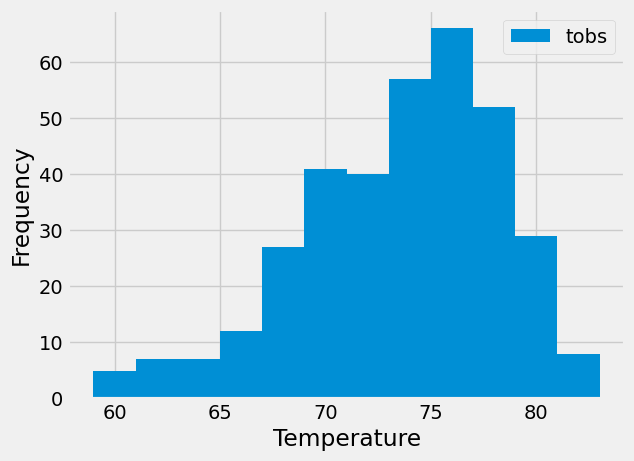

In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures_most_active_station = session.query(measurement.tobs).filter(measurement.station == most_active_station).filter(measurement.date > one_year_before)
temp_most_active_station_df = pd.DataFrame(temperatures_most_active_station, columns=['tobs'])

plt.hist(temp_most_active_station_df['tobs'], bins = 12)
plt.legend(labels={'tobs':"blue"}, loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [53]:
# Close Session
session.close()